# Project 1 - DATA 201 / Hye Young Park

In [182]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import time

## Load the CSV File, view it and check the type.
### - Referrence: Maryland Crime Data by County from 1975-2016: Violent Crime statistics by county from Kaggle
### https://www.kaggle.com/kevin2k1503/maryland-crime-data-by-county-from-19752016


In [183]:
data = pd.read_csv('C:/Users/Yanvi/Desktop/Data 201/Project 1/MDcrime.csv')
print(data)
type(data)

          JURISDICTION      YEAR  POPULATION  MURDER  RAPE  ROBBERY  \
0      Allegany County  1/1/1975       79655       3     5       20   
1      Allegany County  1/1/1976       83923       2     2       24   
2      Allegany County  1/1/1977       82102       3     7       32   
3      Allegany County  1/1/1978       79966       1     2       18   
4      Allegany County  1/1/1979       79721       1     7       18   
5      Allegany County  1/1/1980       80461       2    12       26   
6      Allegany County  1/1/1981       81781      11    13       24   
7      Allegany County  1/1/1982       81858       1    18       18   
8      Allegany County  1/1/1983       82605       5     9       19   
9      Allegany County  1/1/1984       80835       2    15        6   
10     Allegany County  1/1/1985       77655       0     7       12   
11     Allegany County  1/1/1986       78947       1    11       12   
12     Allegany County  1/1/1987       75697       2     9       22   
13    

pandas.core.frame.DataFrame

## Check the total rows and columns and remove uninteresting columns

In [184]:
data.shape
data.columns # check columns

Index(['JURISDICTION', 'YEAR', 'POPULATION', 'MURDER', 'RAPE', 'ROBBERY',
       'AGGASSAULT', 'BE', 'LARCENY THEFT', 'MotorvehicleTHEFT', 'GRAND TOTAL',
       'PERCENT CHANGE', 'violentcrimetotal', 'VIOLENT CRIME PERCENT',
       'VIOLENT CRIME PERCENT CHANGE', 'PROPERTY CRIME TOTALS',
       'PROPERTY CRIME PERCENT', 'PROPERTY CRIME PERCENT CHANGE',
       'OVERALL CRIME RATE PER 100,000 PEOPLE',
       'OVERALL PERCENT CHANGE PER 100,000 PEOPLE',
       'violentcrimerateper_100000',
       'VIOLENT CRIME RATE PERCENT CHANGE PER 100,000 PEOPLE',
       'PROPERTY CRIME RATE PER 100,000 PEOPLE',
       'PROPERTY CRIME RATE PERCENT CHANGE PER 100,000 PEOPLE',
       'murderper100000', 'RAPE PER 100,000 PEOPLE', 'robberyper100000',
       'AGG. ASSAULT PER 100,000 PEOPLE', 'B & E PER 100,000 PEOPLE',
       'LARCENY THEFT PER 100,000 PEOPLE', 'M/V THEFT PER 100,000 PEOPLE',
       'MURDER  RATE PERCENT CHANGE PER 100,000 PEOPLE',
       'RAPE RATE PERCENT CHANGE PER 100,000 PEOPLE',
   

In [185]:
# get rid of uninteresting columns
data.drop(data.iloc[:, 18:38], axis=1,inplace=True)

In [186]:
len(data.columns)

18

In [187]:
print(data)

          JURISDICTION      YEAR  POPULATION  MURDER  RAPE  ROBBERY  \
0      Allegany County  1/1/1975       79655       3     5       20   
1      Allegany County  1/1/1976       83923       2     2       24   
2      Allegany County  1/1/1977       82102       3     7       32   
3      Allegany County  1/1/1978       79966       1     2       18   
4      Allegany County  1/1/1979       79721       1     7       18   
5      Allegany County  1/1/1980       80461       2    12       26   
6      Allegany County  1/1/1981       81781      11    13       24   
7      Allegany County  1/1/1982       81858       1    18       18   
8      Allegany County  1/1/1983       82605       5     9       19   
9      Allegany County  1/1/1984       80835       2    15        6   
10     Allegany County  1/1/1985       77655       0     7       12   
11     Allegany County  1/1/1986       78947       1    11       12   
12     Allegany County  1/1/1987       75697       2     9       22   
13    

## Filter the Dataframe

In [188]:
twenty_six = time.strptime('1/1/06', '%d/%m/%y')
print(twenty_six)
data['YEAR'] = pd.to_datetime(data['YEAR'])
data = data[(data['YEAR'].dt.year >= twenty_six.tm_year)]
print(data)

time.struct_time(tm_year=2006, tm_mon=1, tm_mday=1, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=6, tm_yday=1, tm_isdst=-1)
              JURISDICTION       YEAR  POPULATION  MURDER  RAPE  ROBBERY  \
31         Allegany County 2006-01-01       73841       1    29       37   
32         Allegany County 2007-01-01       71977       0    20       35   
33         Allegany County 2008-01-01       71806       1    17       34   
34         Allegany County 2009-01-01       72312       1    25       38   
35         Allegany County 2010-01-01       72721       4    26       48   
36         Allegany County 2011-01-01       75799       6    30       62   
37         Allegany County 2012-01-01       75413       3    22       42   
38         Allegany County 2013-01-01       73834       4    28       63   
39         Allegany County 2014-01-01       73299       2    15       31   
40        Allegany County  2015-01-01       72230       3    24       58   
41        Allegany County  2016-01-01       71

## Calculate the basic stat and Run the bootstrapping simulation

In [189]:
data.describe().T # no missing values in this dataset

,count,mean,std,min,25%,50%,75%,max
POPULATION,264.0,242354.950758,288603.087298,19592.0,43900.750,102425.50,255578.250,1047303.0
MURDER,264.0,19.113636,53.252415,0.0,1.000,3.00,7.250,344.0
RAPE,264.0,53.674242,75.925769,0.0,9.000,24.00,44.250,341.0
ROBBERY,264.0,473.787879,982.091522,1.0,24.750,67.50,216.750,5288.0
AGGASSAULT,264.0,742.962121,1212.275552,24.0,102.750,286.50,571.250,6196.0
BE,264.0,1392.507576,2003.406174,84.0,267.500,596.50,1113.500,8649.0
LARCENY THEFT,264.0,4862.348485,6466.448160,158.0,737.750,1990.50,3827.500,26171.0
MotorvehicleTHEFT,264.0,780.609848,1790.245771,3.0,41.000,110.50,377.250,12944.0
GRAND TOTAL,264.0,8325.003788,12089.274477,294.0,1177.500,3113.50,6054.250,54499.0
PERCENT CHANGE,264.0,-1.957197,8.659988,-25.3,-7.225,-1.95,3.150,35.5


In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 31 to 1007
Data columns (total 18 columns):
JURISDICTION                     264 non-null object
YEAR                             264 non-null datetime64[ns]
POPULATION                       264 non-null int64
MURDER                           264 non-null int64
RAPE                             264 non-null int64
ROBBERY                          264 non-null int64
AGGASSAULT                       264 non-null int64
BE                               264 non-null int64
LARCENY THEFT                    264 non-null int64
MotorvehicleTHEFT                264 non-null int64
GRAND TOTAL                      264 non-null int64
PERCENT CHANGE                   264 non-null float64
violentcrimetotal                264 non-null int64
VIOLENT CRIME PERCENT            264 non-null float64
VIOLENT CRIME PERCENT CHANGE     264 non-null float64
PROPERTY CRIME TOTALS            264 non-null int64
PROPERTY CRIME PERCENT           264 non-null

In [191]:
data_sample = data['GRAND TOTAL'][np.random.choice(data.index, 100)]
data_sample.median()

3379.5

In [192]:
resample_1 = data_sample.sample(100, replace=True)
resample_1.median()

3689.5

In [193]:
resample_2 = data_sample.sample(100, replace=True)
resample_2.median()

3035.0

In [194]:
resample_3 = data_sample.sample(100, replace=True)
resample_3.median()

3916.0

In [195]:
np.random.seed(111)
resamples_medians = pd.Series(index = np.arange(1000))
for i in range(1000):
    resamples_medians[i] = data_sample.sample(100, replace=True).median()
    
print(resamples_medians.median())
print(resamples_medians.mean())
print(resamples_medians.quantile(0.025))
print(resamples_medians.quantile(0.975))

3372.5
3286.3665
2675.5125000000003
3917.0


In [196]:
data_sample.median()

3379.5

## Plot the histogram of Grand Total from 2006 to 2016 by County

In [197]:
datagroup = data.groupby('JURISDICTION')['GRAND TOTAL'].sum()
datagroup.head(25)

JURISDICTION
Allegany County            23750
Allegany County             4809
Anne Arundel County       169514
Anne Arundel County        30047
Baltimore City            440914
Baltimore County          321542
Calvert County             20466
Caroline County            11305
Carroll County             31179
Cecil County               41004
Charles County             46715
Dorchester County          14018
Frederick County           49909
Garrett County              6326
Harford County             54500
Howard County              79290
Kent County                 4633
Montgomery County         242008
Prince George's County    433866
Queen Anne's County        10802
Somerset County             7530
St. Mary's County          28944
Talbot County              10532
Washington County          39515
Wicomico County            47894
Name: GRAND TOTAL, dtype: int64

Text(0, 0.5, 'Grand Total for 10 years')

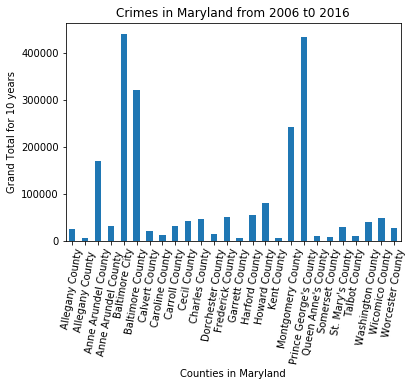

In [198]:
datagroup.columns = ['JURISDICTION', 'GRAND TOTAL']
datagroup.plot.bar(title="Crimes in Maryland from 2006 t0 2016")
plt.xlabel('Counties in Maryland')
plt.xticks(rotation=80)
plt.ylabel('Grand Total for 10 years')

### Summary
#### This dataset is about crimes by 24 counties in Maryland from 1975 to 2016. I was interested in for last 10 years so that the data set has been filtered from 2006 to 2016. There are crimes: MURDER, RAPE, ROBBERY, AGGASSAULT, B&E, LARCENY THEFT, and MotorvehicleTHEFT. To see which counties are safe and not safe for the past 10 years, I used this dataset. According to the graph, Garrett County, Kent County and Somerset County, etc. is safe. However, there is high rate of crimes in Balitmore City and County, Montgomery County and Prince Geroge's County.